# Семинар 02 - kNN, Bayes
---
Урок основан на открытых материалах [Evgeny Sokolov](https://github.com/esokolov) и [YSDA](https://github.com/yandexdataschool).

<a id="Content"></a>
# Содержание
0. [Загрузка данных](#0)
   - [Описание данных](#0.0)
   - [Формирование датасета](#0.1)
   - [Визуализация данных](#0.2)
1. [Naive Bayes Classifier](#1)
   - [Реализация класса GaussianDistribution](#1.1)
   - [Реализация классификатора Naive Bayes](#1.2)
   - [Обучение байесовского классификатора](#1.3)
   - [Naive Bayes in text classification](#1.4)
2. [kNN - метод ближайших соседей](#2)
   - [Нормировка данных](#2.1)
   - [Парметры и гиперпараметры](#2.2)
   - [Реализация kNN для бинарной классификации](#2.3)
   - [Метрики бинарной классификации](#2.4)
   - [kNN для многоклассовой классификации на примере датасета рукописный цифр](#2.5)

<a id="0"></a>
# 0. Загрузка данных

In [11]:
# базовый набор для обработки даннных
import scipy
import numpy as np
import pandas as pd

from collections import Counter
import functools
import warnings

# отображение данных
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# данные и алгоритмы ML
from sklearn import datasets

#%matplotlib inline
%load_ext autoreload
%autoreload 2

# matplotlib.rcParams['font.size'] = 11
# matplotlib.style = 'seaborn'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Сначала для загрузки набора данных мы будем использовать пакет [`sklearn`](https://scikit-learn.org/stable/), который будем активно использовать на протяжении всего курса.

sklearn реализует большинство классических и часто используемых алгоритмов машинного обучения. Также он предоставляет [Руководство пользователя](https://scikit-learn.org/stable/user_guide.html), описывающее принципы каждой группы реализованных алгоритмов.

В качестве отправной точки для основных концепций sklearn мы рекомендуем [руководство по началу работы](https://scikit-learn.org/stable/getting_started.html)(проверьте сами). [Дополнительные руководства](https://scikit-learn.org/stable/tutorial/index.html) также могут быть полезны для развития ваших навыков.

Первая функциональность, которую мы используем, — удобная загрузка [общих наборов данных](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets). Все, что нам нужно сделать, это всего лишь один вызов функции.

<a id="0.0"></a>
## 0.0. Описание данных

Посмотрим, что у нас есть:

In [12]:
dataset = datasets.load_iris()

print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Объект, сгенерированный [`load_iris`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html), описывается как:

> Объект, похожий на словарь, интересные атрибуты:
>
> «data», данные для изучения,
>
> «target», классификационные метки,
>
>"target_names", значение меток,
>
>"feature_names", значение функций,
>
> «DESCR», полное описание набора данных,

Если вы не знакомы с набором данных Iris - найдите минутку, чтобы прочитать описание выше =) (как всегда [подробнее об этом в Википедии](https://en.wikipedia.org/wiki/Iris_flower_data_set))

__TL;DR__ 150 объектов, __равномерно__ распределенных по 3 классам, каждый из которых описан 4 непрерывными функциями.

<a id="0.1"></a>
## 0.1. Формирование датасета

In [13]:
features = dataset.data
target = dataset.target

features.shape, target.shape

((150, 4), (150,))

In [15]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [16]:
# сформируем датасет
X = pd.DataFrame(features, columns=dataset['feature_names'])

X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [17]:
print(dataset['target_names'])
y = target
y

['setosa' 'versicolor' 'virginica']


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [18]:
df = X.copy()
df['target'] = y

In [19]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**Задание 0:** Вспомните, что обозначает принцип IID - Independent and Identical Distribution?

<a id="0.2"></a>
## 0.2. Визуализация данных

D:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

D:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



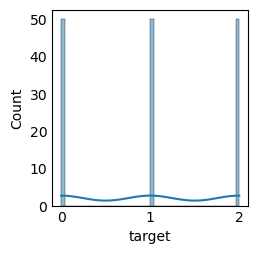

In [20]:
# посмотрим на распределение меток
sns.histplot(x='target', data=df, bins=50, kde=True)
plt.xlabel('target')
plt.grid()
plt.show()

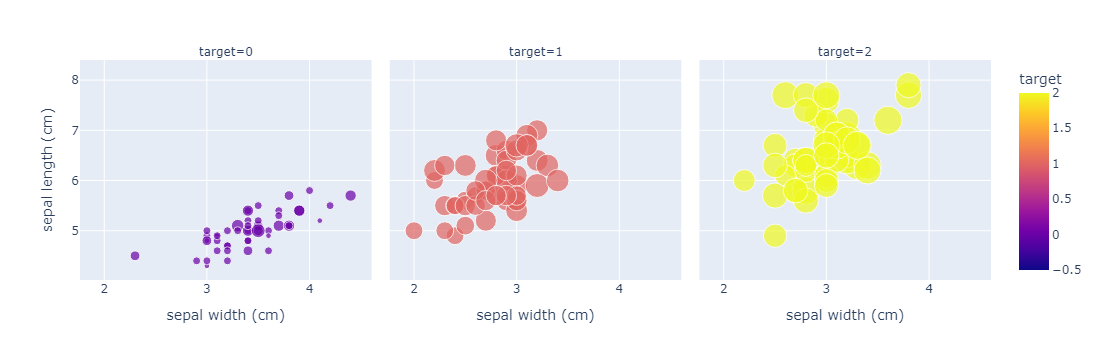

In [23]:
# добавляется разделение на подграфики автоматически при добавления параметра facet_col
fig = px.scatter(df, x="sepal width (cm)", y="sepal length (cm)", color="target",
                 size='petal width (cm)', hover_data=['petal length (cm)'], facet_col="target")
fig.show()

Наш набор данных имеет 4 измерения, однако люди чаще используют трехмерные или даже двухмерные данные, поэтому давайте нанесем первые 3 функции, окрашенные значениями меток.

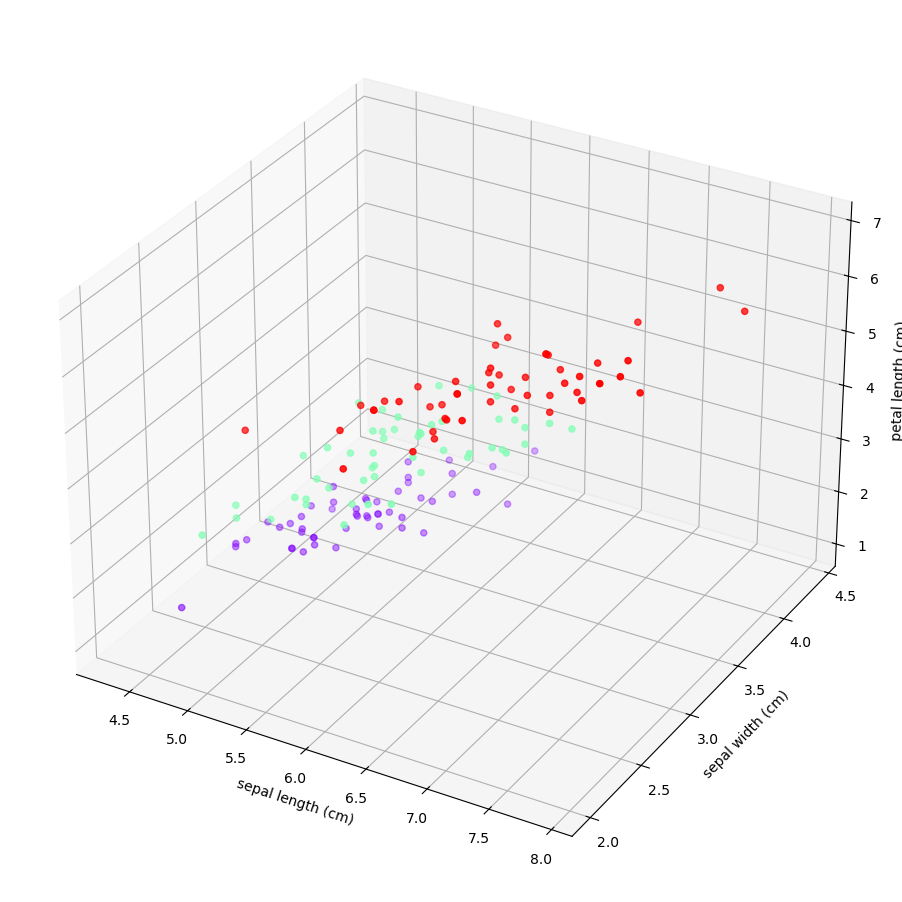

In [24]:
plt.style.use('_mpl-gallery')

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(9, 9))
cmap = plt.get_cmap("rainbow")
ax.scatter(features[:, 0], features[:, 1], features[:, 2], c=target, cmap=cmap, marker='o')

ax.set_xlabel(dataset.feature_names[0])
ax.set_ylabel(dataset.feature_names[1])
ax.set_zlabel(dataset.feature_names[2])

plt.show()

Затем посмотрите на распределения функций

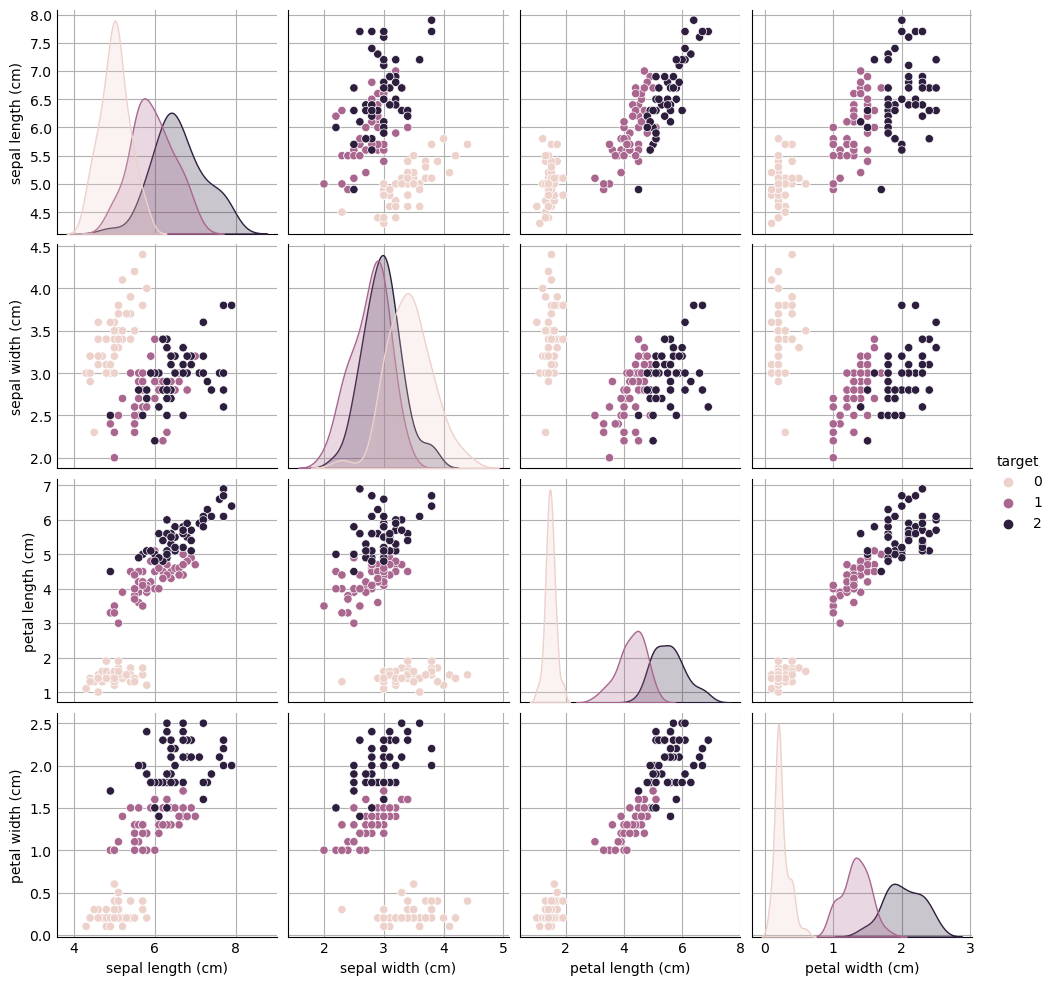

In [25]:
warnings.filterwarnings('ignore')

# нормальное распределение
sns.pairplot(data=df, hue='target')
plt.show()

В лекции говорилось об использовании априорного распределения для признаков, чаще всего мы используем Гауссово,

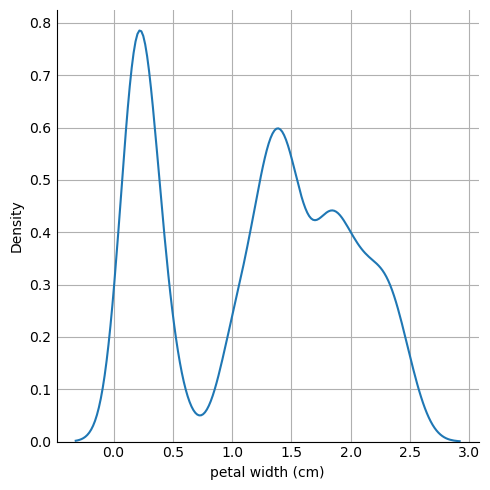

In [26]:
# тут на графике распределение для всех классов
sns.displot(df['petal width (cm)'],kind="kde", bw_adjust=.5)

Обратите внимание, что каждый график выше имеет собственный масштаб

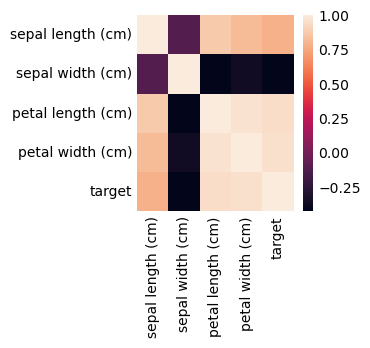

In [27]:
sns.heatmap(df.corr())
plt.show()

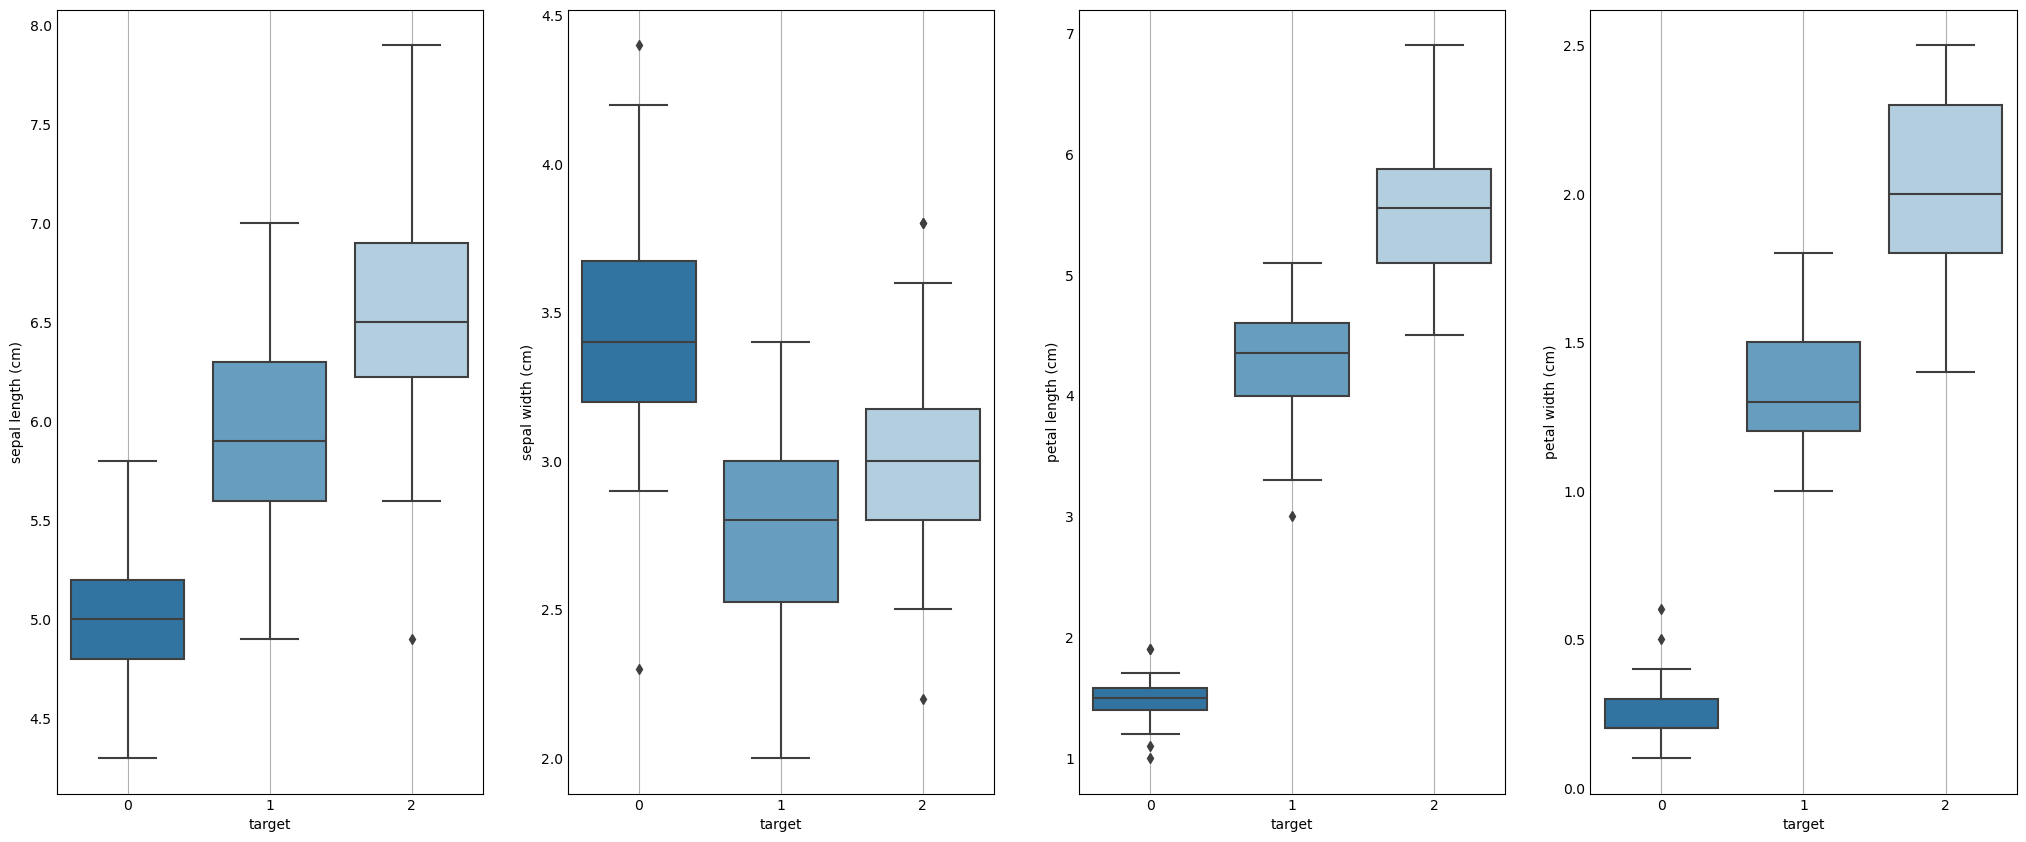

In [28]:
plt.figure(figsize=(20 , 8))

for i, col in enumerate(X.columns):
    plt.subplot(1, len(X.columns), i + 1)
    sns.boxplot(y=col, x='target', data=df)
    plt.grid()
    
plt.show()

<a id="1"></a>
# 1. Naive Bayes Classifier

<a id="1.1"></a>
## 1.1. Реализация класса GaussianDistribution

Поскольку мы стремимся сначала реализовать алгоритм наивного Байеса, нам нужно определить некоторое предварительное распределение.

Наиболее распространенное распределение (конечно) гауссово, и его параметры - среднее значение и стандартное отклонение. Давайте реализуем класс, принимающий список значений признаков, оценивающий параметры распределения и способный дать плотность вероятности любого заданного значения признака.

Обозначим нормальное распределение $\mathcal{N}(\mu, \sigma^2)$ PDF:
$$
f(x|\mu, \sigma^2) = \frac{1}{\sigma\sqrt{2\pi}}\exp(-\frac{(x - \mu)^2}{2\sigma^ 2})
$$
Давайте реализуем класс GaussianDistribution. (Конечно, на практике всегда можно использовать что-то вроде `scipy.stats.norm`).

Обратите внимание, что выполнение вычислений с логарифмическими вероятностями более стабильно.

$$
log(f(x|\mu, \sigma^2)) = -log(\sigma \sqrt{2 \pi})- \frac{(x - \mu)^2}{2\sigma^ 2}
$$

**Задание 1:** Реализуйте вычисления логарифма функции плотности вероятности нормального распределения в функции logpdf, а затем с помощью реализованной logpdf сделайте реализацию вычисления функции плотности вероятности нормального распределения в функции pdf

In [29]:
class GaussianDistribution:
    def __init__(self, feature):
        '''
        Args:
            feature: column of design matrix, represents all available values
                of feature to model.
                axis=0 stays for samples.
        '''
        self.mean = feature.mean(axis=0)
        self.std = feature.std(axis=0)

    def logpdf(self, value):
        '''Logarithm of probability density at value'''
        return -np.log(self.std * np.sqrt(2 * np.pi)) - (value - self.mean) ** 2 / (2 * self.std ** 2)
    
    def pdf(self, value):
        return np.exp(self.logpdf(value))
    
    def __repr__(self):
        return f'GaussianDistribution, mu={self.mean:.4f}, std={self.std:.4f}'

Проверяем результат:

In [31]:
_test = scipy.stats.norm(loc=features.mean(axis=0), scale=features.std(axis=0))

assert np.allclose(
    GaussianDistribution(features).logpdf(features[:5, :]),
    _test.logpdf(features[:5, :])
)
print('Seems fine!')

Seems fine!


In [32]:
_test.std()

array([0.82530129, 0.43441097, 1.75940407, 0.75969263])

In [33]:
for i in range(4):
    print(GaussianDistribution(features[:, i]).std)

0.8253012917851409
0.4344109677354946
1.759404065775303
0.7596926279021594


<a id="1.2"></a>
## 1.2. Реализация классификатора Naive Bayes

$$
P(A|B) = \frac{P(B|A) P(A)}{P(B)}
$$

Давайте теперь сосредоточимся на проблеме классификации. Для класса $K$ пометьте $y_i \in \{C_1, \ldots, C_k\}$. Задача классификации цветков имеет 3 класса, поэтому $K=3$. Теорема Байеса принимает следующий вид:

$$
P(y_i = C_k|\mathbf{x}_i) = \frac{P(\mathbf{x}_i|y_i = C_k) P(y_i = C_k)}{P(\mathbf{x}_i)}
$$

$$
x_i \in R^p - {вектор \: признаков}
$$

$$
P(\mathbf{x}_i|y_i = C_k) = \prod\limits_{l = 1}^p P(\mathbf{x}^l_i|y_i = C_k)
$$

Обратите внимание, что здесь мы также предпочитаем работать с логарифмическими вероятностями. Таким образом, приведенное выше уравнение примет следующий вид:
$$
\log P(y_i = C_k|\mathbf{x}_i) = \log P(\mathbf{x}_i|y_i = C_k) + \log P(y_i = C_k) - \log P(\mathbf{x} _i) = \sum_{l=1}^p\log P(\mathbf{x}_i^l|y_i = C_k) + \log P(y_i = C_k) - \log P(\mathbf{x} _i)
$$

Как можно заметить, для нахождения метки класса с наибольшей вероятностью нам даже не нужен последний член $P(\mathbf{x}_i)$ (т.к он не зависит от k). Однако это необходимо для получения правильной оценки вероятности $P(y_i = C_k|\mathbf{x}_i)$. Член $P(\mathbf{x}_i)$ можно вычислить, используя следующее свойство:
$$
P(\mathbf{x}_i) = \sum_{k=1}^K P(\mathbf{x}_i|y_i=C_k).
$$
Его можно вычислить из значений $\log P(\mathbf{x}_i|y_i=C_k)$ с помощью функции `logsumexp`, расположенной в `scipy.special`.

Теперь давайте реализуем сам классификатор Naive Bayes. Приведенный ниже класс унаследован от базовых классов ```sklearn``` и предоставляет все основные методы.

[BaseEstimator](https://stackoverflow.com/questions/15233632/baseestimator-in-sklearn-base-python) - for grid search

[ClassifierMixin](https://scikit-learn.org/stable/modules/generated/sklearn.base.ClassifierMixin.html) - for mean accuracy

In [34]:
from sklearn.base import BaseEstimator, ClassifierMixin 
from scipy.special import logsumexp

**Задание 2**: Посчитайте априорную вероятность для каждого класса $$\log P(y_i = C_k)$$

In [36]:
class NaiveBayes(BaseEstimator, ClassifierMixin):
    '''
    Обратите внимание, что использование `X` и `y` для матрицы признаков и меток в целом не является хорошим выбором,
    лучше придерживаться более информативных соглашений об именах.
    Однако, чтобы сделать код совместимым с реализацией sklearn, мы используем здесь переменные `X` и `y`.
    '''
    def fit(self, X, y, sample_weight=None, distributions=None):
        '''
        sample_weight 
            The argument is ignored. For comatibility only.
        '''
        self.unique_labels = np.unique(y)
        
        # If distributions of features are not specified, they a treated Gaussian
        if distributions is None:
            distributions = [GaussianDistribution] * X.shape[1]
        else:
            # Check whether distributions are passed for all features
            assert len(distributions) == X.shape[1]        

            
        # Здесь мы находим параметры распределения для каждого признака в каждом подмножестве классов
        # поэтому P(x^i|y=C_k) будет оцениваться только с использованием информации из i-го признака значений класса C_k
        self.conditional_feature_distributions = {} # label: [distribution for feature 1, ...]
        for label in self.unique_labels:
            feature_distribution = []
            for column_index in range(X.shape[1]): # count of features
                # `column_index` feature values for objects from `label` class
                feature_column = X[y == label, column_index]
                fitted_distr = distributions[column_index](feature_column)
                feature_distribution.append(fitted_distr)
            self.conditional_feature_distributions[label] = feature_distribution

        # Prior label distributions (unconditional probability of each class)
        self.prior_label_distribution = {unique_label: } #YOUR_CODE_HERE


    def predict_log_proba(self, X):
        # Matrix of shape (n_objects : n_classes)
        class_log_probas = np.zeros((X.shape[0], len(self.unique_labels)), dtype=float)
        
        # Здесь мы вычисляем логарифмические вероятности класса для каждого класса последовательно
        for label_idx, label in enumerate(self.unique_labels):
            for idx in range(X.shape[1]):
                # Вся логарифмическая вероятность для каждого признака -- фиксированная метка
                class_log_probas[:, label_idx] += self.conditional_feature_distributions[label][idx].logpdf(X[:, idx]) 

            # Add log proba of label prior
            class_log_probas[:, label_idx] += np.log(self.prior_label_distribution[label])

        
        class_log_probas -= logsumexp(class_log_probas, axis=1)[:, None] 
        return class_log_probas
    
    def predict_proba(self, X):
        return np.exp(self.predict_log_proba(X))
    
    def predict(self, X):
        log_probas = self.predict_log_proba(X)
        # нам нужно привести метки к их первоначальному виду (они могут начинаться с числа, отличного от 0)
        return np.array([self.unique_labels[idx] for idx in log_probas.argmax(axis=1)])

In [37]:
nb = NaiveBayes()
nb.fit(features, target)

In [39]:
assert len(nb.conditional_feature_distributions) == 3
assert len(nb.conditional_feature_distributions[1]) == 4

In [40]:
nb.conditional_feature_distributions

{0: [GaussianDistribution, mu=5.0060, std=0.3489,
  GaussianDistribution, mu=3.4280, std=0.3753,
  GaussianDistribution, mu=1.4620, std=0.1719,
  GaussianDistribution, mu=0.2460, std=0.1043],
 1: [GaussianDistribution, mu=5.9360, std=0.5110,
  GaussianDistribution, mu=2.7700, std=0.3106,
  GaussianDistribution, mu=4.2600, std=0.4652,
  GaussianDistribution, mu=1.3260, std=0.1958],
 2: [GaussianDistribution, mu=6.5880, std=0.6295,
  GaussianDistribution, mu=2.9740, std=0.3193,
  GaussianDistribution, mu=5.5520, std=0.5463,
  GaussianDistribution, mu=2.0260, std=0.2719]}

In [41]:
assert np.unique(list(nb.prior_label_distribution.values())) == np.array([0.3333333333333333333])

In [42]:
print('log probas:\n{}'.format(nb.predict_log_proba(features[:2])))
print('predicted probas:\n{}'.format(nb.predict_proba(features[:2])))
print('predicted labels:\n{}'.format(nb.predict(features[:2])))
print('\nIt`s alive! More tests coming.')

log probas:
[[  0.         -41.14063634 -57.90531295]
 [  0.         -38.72865982 -56.71097942]]
predicted probas:
[[1.00000000e+00 1.35784018e-18 7.11282484e-26]
 [1.00000000e+00 1.51480506e-17 2.34819724e-25]]
predicted labels:
[0 0]

It`s alive! More tests coming.


<a id="1.3"></a>
## 1.3. Обучение байесовского классификатора

Теперь давайте проверим наш наивный байесовский классификатор на необработанных данных. Для этого мы будем использовать `train_test_split` из `sklearn`.

In [43]:
from sklearn.model_selection import train_test_split

In [48]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25,
                                                                            stratify=target)

print(features_train.shape, features_test.shape)

(112, 4) (38, 4)


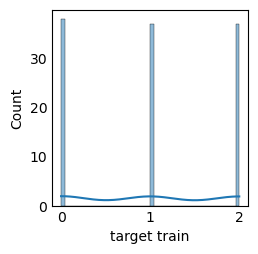

In [49]:
sns.histplot(data=target_train, bins=50, kde=True)
plt.xlabel('target train')
plt.grid()
plt.show()

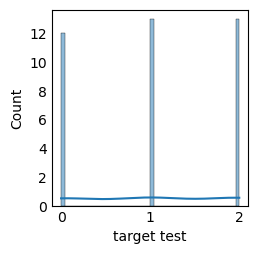

In [50]:
sns.histplot(data=target_test, bins=50, kde=True)
plt.xlabel('target test')
plt.grid()
plt.show()

In [51]:
nb = NaiveBayes()
nb.fit(features_train, target_train, distributions=[GaussianDistribution]*4)
nb_test_log_proba = nb.predict_log_proba(features_test)

In [52]:
print('Naive Bayes classifier accuracy on the train set: {}'.format(nb.score(features_train, target_train)))

Naive Bayes classifier accuracy on the train set: 0.9642857142857143


In [53]:
print('Naive Bayes classifier accuracy on the test set: {}'.format(nb.score(features_test, target_test)))

Naive Bayes classifier accuracy on the test set: 0.9473684210526315


Наконец, давайте сравним наивный байесовский классификатор с реализациями ```sklearn```.

In [54]:
from sklearn import naive_bayes

In [55]:
sklearn_nb = naive_bayes.GaussianNB()
sklearn_nb.fit(features_train, target_train)
sklearn_nb_test_log_proba = sklearn_nb.predict_log_proba(features_test)

In [56]:
print('sklearn implementation accuracy on the train set: {}'.format(sklearn_nb.score(features_train, target_train)))

sklearn implementation accuracy on the train set: 0.9642857142857143


In [58]:
print('sklearn implementation accuracy on the test set: {}'.format(sklearn_nb.score(features_test, target_test)))

sklearn implementation accuracy on the test set: 0.9473684210526315


Проверим прогнозы. Если вы использовали распределение Гаусса и все сделали правильно, логарифмические вероятности должны быть одинаковыми.

In [59]:
assert np.allclose(nb_test_log_proba, sklearn_nb_test_log_proba), 'log probabilities do not match'
print('Seems alright!')

Seems alright!


<a id="1.4"></a>
## 1.4. Naive Bayes in text classification
[Dataset](https://paperswithcode.com/dataset/sst) sentences extracted from movie reviews.

In [26]:
# do not change the code in the block below
# __________start of block__________
df_text = pd.read_csv(
    'https://github.com/clairett/pytorch-sentiment-classification/raw/master/data/SST2/train.tsv',
    delimiter='\t',
    header=None
)

texts_train = df_text[0].values[:5000]
y_train = df_text[1].values[:5000]
texts_test = df_text[0].values[5000:]
y_test = df_text[1].values[5000:]

from nltk.tokenize import WordPunctTokenizer
tokenizer = WordPunctTokenizer()
preprocess = lambda text: ' '.join(tokenizer.tokenize(text.lower()))

text = 'How to be a grown-up at work: replace "I don\'t want to do that" with "Ok, great!".'
print("before:", text,)
print("after:", preprocess(text),)

texts_train = [preprocess(text) for text in texts_train]
texts_test = [preprocess(text) for text in texts_test]

# Small check that everything is done properly
assert texts_train[5] ==  'campanella gets the tone just right funny in the middle of sad in the middle of hopeful'
assert texts_test[74] == 'poetry in motion captured on film'
assert len(texts_test) == len(y_test)
# __________end of block__________

before: How to be a grown-up at work: replace "I don't want to do that" with "Ok, great!".
after: how to be a grown - up at work : replace " i don ' t want to do that " with " ok , great !".


In [27]:
k = min(10000, len(set(' '.join(texts_train).split())))

counts = Counter(' '.join(texts_train).split()) # сколько каждого слова в тренировочной выборке (типо словарь)

bow_vocabulary = [key for key, val in counts.most_common(k)] # список k чаще всего встречающихся слов


def text_to_bow(text, bow_voc):
    """ convert text string to an array of token counts. Use bow_vocabulary. """
    sent_vec = np.zeros(len(bow_voc))
    counts = Counter(text.split())
    for i, token in enumerate(bow_voc):
        if token in counts:
            sent_vec[i] = counts[token]
    return np.array(sent_vec, 'float32')

# в итоге мы получим матрицу, где строка матрицы показывает наличие или отсутствие слова в исходной строке
X_train_bow = np.stack(list(map(functools.partial(text_to_bow, bow_voc=bow_vocabulary), texts_train))) # применили к каждому списку из слов функцию, которая возвращает число встретившихся слов по списку bow_vocabulary 
X_test_bow = np.stack(list(map(functools.partial(text_to_bow, bow_voc=bow_vocabulary), texts_test)))

# Small check that everything is done properly if you are using local bow implementation
k_max = len(set(' '.join(texts_train).split()))
assert X_train_bow.shape == (len(texts_train), min(k, k_max))
assert X_test_bow.shape == (len(texts_test), min(k, k_max))
assert np.all(X_train_bow[5:10].sum(-1) == np.array([len(s.split()) for s in  texts_train[5:10]]))
assert len(bow_vocabulary) <= min(k, k_max)
assert X_train_bow[65, bow_vocabulary.index('!')] == texts_train[65].split().count('!')

In [28]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB# your code here

In [29]:
clf_nb_bow = MultinomialNB()# your code here
clf_nb_bow.fit(X_train_bow, y_train)

MultinomialNB()

In [30]:
print('sklearn implementation accuracy on the test set: {}'.format(clf_nb_bow.score(X_test_bow, y_test)))

sklearn implementation accuracy on the test set: 0.79375


In [31]:
clf_nb_bow_my = NaiveBayes()
clf_nb_bow_my.fit(X_train_bow, y_train)

In [32]:
X_train_bow.shape

(5000, 10000)

In [33]:
print('sklearn implementation accuracy on the test set: {}'.format(clf_nb_bow_my.score(X_test_bow, y_test)))

sklearn implementation accuracy on the test set: 0.47760416666666666


Полезная статья про байессовский классификатор: [The Optimality of Naive Bayes](https://www.cs.unb.ca/~hzhang/publications/FLAIRS04ZhangH.pdf)

<a id="2"></a>
# 2. kNN - метод ближайших соседей

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

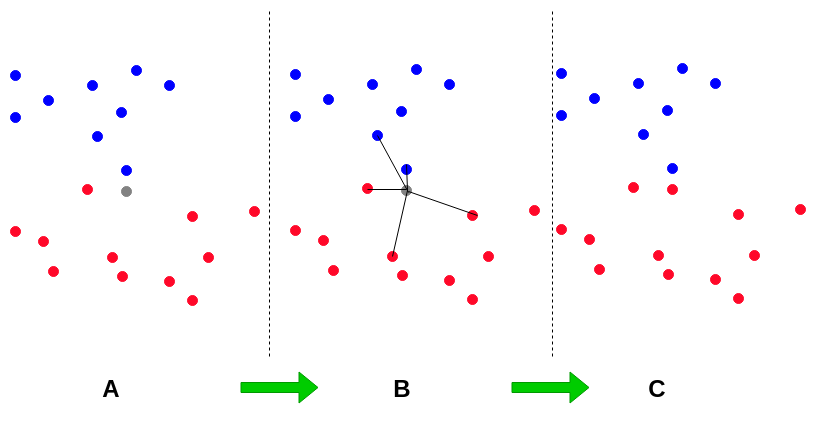

<a id="2.1"></a>
## 2.1. Нормировка данных

In [60]:
X = pd.DataFrame(features, columns=dataset['feature_names'])
y = target

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X[['sepal length (cm)', 'petal length (cm)']], y,
                                                    train_size=0.8, test_size=0.2,
                                                    shuffle=True, random_state=42, stratify=y)

In [62]:
X_train.shape, X_test.shape

((120, 2), (30, 2))

((array([ 6., 19., 13., 22., 14., 20., 11.,  5.,  4.,  6.]),
  array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
  <BarContainer object of 10 artists>),
 (array([36.,  4.,  0.,  1.,  7., 23., 22., 13.,  9.,  5.]),
  array([1.1 , 1.68, 2.26, 2.84, 3.42, 4.  , 4.58, 5.16, 5.74, 6.32, 6.9 ]),
  <BarContainer object of 10 artists>))

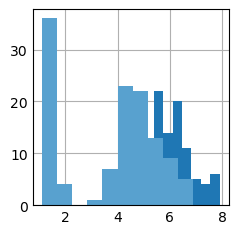

In [63]:
plt.hist(X_train['sepal length (cm)']), plt.hist(X_train['petal length (cm)'])

### Зачем нужна нормализация данных в kNN?

![image.png](img/without_norm.png)
![image.png](img/with_norm.png)

In [66]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [67]:
print(f"after normalization mean: {X_train[:,1].mean()}, std: {X_train[:,1].std()}")

after normalization mean: 4.958996176659033e-16, std: 1.0000000000000002


((array([ 6., 19., 13., 22., 17., 17., 11.,  5.,  4.,  6.]),
  array([-1.84098286, -1.41108848, -0.98119411, -0.55129973, -0.12140536,
          0.30848902,  0.73838339,  1.16827777,  1.59817215,  2.02806652,
          2.4579609 ]),
  <BarContainer object of 10 artists>),
 (array([36.,  4.,  0.,  1., 12., 18., 22., 13.,  9.,  5.]),
  array([-1.5160669 , -1.18673402, -0.85740113, -0.52806825, -0.19873536,
          0.13059752,  0.45993041,  0.7892633 ,  1.11859618,  1.44792907,
          1.77726195]),
  <BarContainer object of 10 artists>))

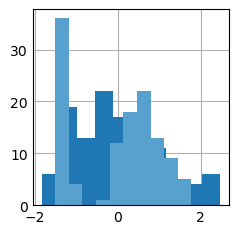

In [68]:
plt.hist(X_train[:,0]), plt.hist(X_train[:,1])

In [69]:
knn = KNeighborsClassifier() # По умочанию - 5 соседей и Евклидова метрика

In [70]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [71]:
pred = pd.DataFrame(knn.predict(X_test), columns=['predict'])
pred['test'] = y_test

In [72]:
pred.head()

,predict,test
0,0,0
1,1,2
2,1,1
3,1,1
4,0,0


In [73]:
accuracy_score(knn.predict(X_test), y_test)

0.9

In [74]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
accuracy_score(knn.predict(X_test), y_test)

0.8666666666666667

In [75]:
knn = KNeighborsClassifier(n_neighbors=80)
knn.fit(X_train, y_train)
accuracy_score(knn.predict(X_test), y_test)

0.6

<a id="2.2"></a>
## 2.2. Парметры и гиперпараметры
[GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

In [77]:
from sklearn.model_selection import GridSearchCV

In [78]:
k_range = list(range(1, 60))
param_grid = dict(n_neighbors=k_range)
  
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=True, verbose=1)

grid_search = grid.fit(X_train, y_train)

Fitting 10 folds for each of 59 candidates, totalling 590 fits


In [79]:
print(grid_search.best_params_)
accuracy = grid_search.best_score_ * 100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

{'n_neighbors': 5}
Accuracy for our training dataset with tuning is : 95.83%


### Кросс-валидация

В [cross-validation](https://en.wikipedia.org/wiki/Cross-validation_(statistics)#k-fold_cross-validation) мы делим тренировочные данные на n фолдов (folds), и по очереди используем каждый из них в качестве проверочных данных (validation data), а остальные -- в качестве тренировочных (training data).

Для нашего примера в качестве финальной оценки эффективности k усредняют значения score на всех фолдах. После этого выбирается значение k с лучшим значением метрики.

![image.png](img/k-folds.png)

<a id="2.3"></a>
## 2.3. Реализация kNN для бинарной классификации

In [80]:
import numpy as np
from sklearn.metrics.pairwise import manhattan_distances

In [81]:
# оставим только классы 0 и 1
binary_X = df[(df['target'] == 0) | (df['target'] == 1)]
binary_y = binary_X['target']

binary_X = binary_X.drop('target', axis=1)

In [82]:
X_binary_train, X_binary_test, y_binary_train, y_binary_test = train_test_split(binary_X, binary_y,
                                                                                train_size=0.8, test_size=0.2,
                                                                                shuffle=True, random_state=42, stratify=binary_y)

In [83]:
X_binary_train.reset_index(drop=True, inplace=True)
X_binary_test.reset_index(drop=True, inplace=True)
y_binary_train.reset_index(drop=True, inplace=True)
y_binary_test.reset_index(drop=True, inplace=True)

**Задание 3:** Реализуйте функцию compute_distance для подсчёта расстояния manhattan_distances для всех объектов тестовой выборки

In [84]:
class KNN:
    """
    K-neariest-neighbor classifier using L1 loss
    """
    def __init__(self, k=5):
        self.k = k

    def fit(self, X, y):
        self.train_X = X
        self.train_y = y

    def _predict(self, dists):
        '''
        Returns model predictions for binary classification case
        
        Arguments:
        dists, np array (num_test_samples, num_train_samples) - array
           with distances between each test and each train sample

        Returns:
        pred, np array of bool (num_test_samples) - binary predictions 
           for every test sample
        '''
        num_test = dists.shape[0]
        pred = np.zeros(num_test, int)
        for i in range(num_test):            
            unique, counts = np.unique(self.train_y.take(np.argsort(dists[i])[:self.k]), return_counts=True)
            pred[i] = unique[np.argmax(counts)]
            
        return pred
    
    def predict(self, X):
        '''
        Uses the KNN model to predict clases for the data samples provided
        
        Arguments:
        X, np array (num_samples, num_features) - samples to run
           through the model
        num_loops, int - which implementation to use

        Returns:
        predictions, np array of ints (num_samples) - predicted class
           for each sample
        '''
        dists = self.compute_distances(X)
        
        return self._predict(dists)

    def compute_distances(self, X):
        '''
        Computes L1 distance from every sample of X to every training sample
        Fully vectorizes the calculations using numpy

        Arguments:
        X, np array (num_test_samples, num_features) - samples to run
        
        Returns:
        dists, np array (num_test_samples, num_train_samples) - array
           with distances between each test and each train sample
        '''
        #YOUR_CODE_HERE
        pass

In [85]:
knn_classifier = KNN(k=5)
knn_classifier.fit(X_binary_train, y_binary_train)

In [86]:
dists = knn_classifier.compute_distances(X_binary_test)
assert np.isclose(dists[0, 10], np.sum(np.abs(X_binary_test.loc[0] - X_binary_train.loc[10])))

In [87]:
prediction = knn_classifier.predict(X_binary_test)

<a id="2.4"></a>
## 2.4. Метрики бинарной классификации

In [88]:
def binary_classification_metrics(prediction, ground_truth):
    '''
    Вычисляет метрики для бинарной классификации
    Аргументы:
     prediction, np массив bool (num_samples) - предсказания модели
     ground_truth, np массив bool (num_samples) - истинные метки
    Возвращает:
     точность, отзыв, f1, точность - показатели классификации
    '''
    tp = np.sum([(prediction[i] == True and ground_truth[i] == True) for i in range(prediction.shape[0])])
    tn = np.sum([(prediction[i] == False and ground_truth[i] == False) for i in range(prediction.shape[0])])
    fp = np.sum([(prediction[i] == True and ground_truth[i] == False) for i in range(prediction.shape[0])])
    fn = np.sum([(prediction[i] == False and ground_truth[i] == True) for i in range(prediction.shape[0])])
            
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    accuracy = (tp + tn) / (tp + tn + fn + fp)
    f1 = 2 * tp / (2 * tp + fp + fn )
    
    return precision, recall, f1, accuracy

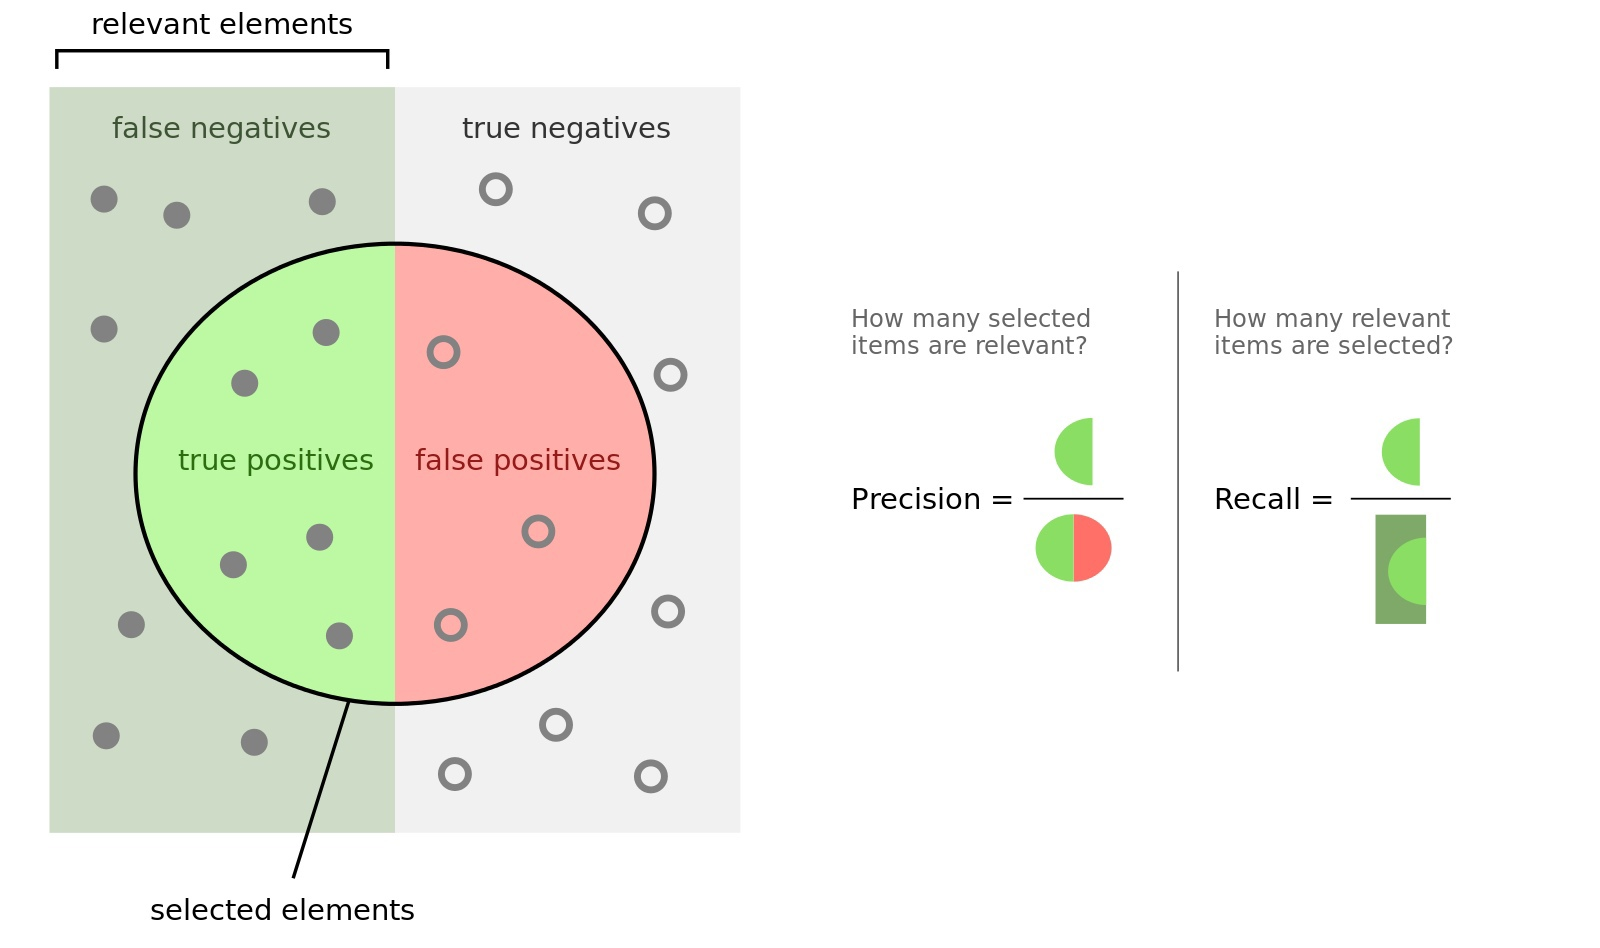

In [89]:
precision, recall, f1, accuracy = binary_classification_metrics(prediction, y_binary_test)
print("KNN with k = %s" % knn_classifier.k)
print("Accuracy: %4.2f, Precision: %4.2f, Recall: %4.2f, F1: %4.2f" % (accuracy, precision, recall, f1)) 

KNN with k = 5
Accuracy: 1.00, Precision: 1.00, Recall: 1.00, F1: 1.00


<a id="2.5"></a>
## 2.5. kNN для многоклассовой классификации на примере датасета рукописный цифр

In [90]:
from sklearn.datasets import load_digits

### Предобработка данных

In [91]:
dataset = datasets.load_digits()

print(dataset.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [92]:
features = dataset.data
target = dataset.target

features.shape, target.shape

((1797, 64), (1797,))

In [94]:
train_X, test_X, train_y, test_y = train_test_split(features, target, test_size=0.25, stratify=target, random_state=26)

print(train_X.shape, test_X.shape)

(1347, 64) (450, 64)


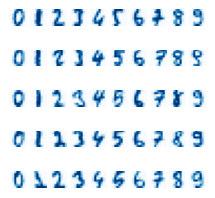

In [95]:
samples_per_class = 5  # Number of samples per class to visualize
plot_index = 1

for example_index in range(samples_per_class):
    for class_index in range(10):
        plt.subplot(5, 10, plot_index)
        image = train_X[train_y == class_index][example_index].reshape((8,8))
        plt.imshow(image.astype(np.uint8))
        plt.axis('off')
        plot_index += 1

In [96]:
# нормализация
scaler_min = train_X.min()
scaler_max = train_X.max()

train_X = (train_X - scaler_min)/(scaler_max - scaler_min)
test_X = (test_X - scaler_min)/(scaler_max - scaler_min)

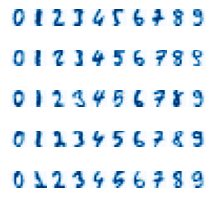

In [97]:
samples_per_class = 5  # Number of samples per class to visualize
plot_index = 1

for example_index in range(samples_per_class):
    for class_index in range(10):
        plt.subplot(5, 10, plot_index)
        image = train_X[train_y == class_index][example_index].reshape((8,8))
        plt.imshow(image, vmin=0, vmax=1)
        plt.axis('off')
        plot_index += 1

### Обучение и замер мультиклассовой точности

In [101]:
train_X = train_X.reshape(train_X.shape[0], -1)
test_X = test_X.reshape(test_X.shape[0], -1)

train_X

array([[0.    , 0.25  , 0.9375, ..., 1.    , 0.5625, 0.    ],
       [0.    , 0.    , 0.4375, ..., 0.1875, 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.3125, 0.    , 0.    ],
       ...,
       [0.    , 0.0625, 0.75  , ..., 0.3125, 0.    , 0.    ],
       [0.    , 0.    , 0.625 , ..., 0.6875, 0.125 , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.375 , 0.    , 0.    ]])

In [102]:
knn_classifier = KNN(k=1)
knn_classifier.fit(train_X, train_y)

In [103]:
predict = knn_classifier.predict(test_X)

In [105]:
def multiclass_accuracy(predictions, ground_truth):
    accuracy = len(predictions[predictions == ground_truth])/(len(ground_truth))
    return accuracy

In [106]:
accuracy = multiclass_accuracy(predict, test_y)
print("Accuracy: %4.2f" % accuracy)

Accuracy: 0.99


### Подбор гиперпараметра с помощью KFold

In [108]:
from sklearn.model_selection import KFold

In [109]:
%%time

num_folds = 5
kf = KFold(n_splits=num_folds)
kf.get_n_splits(train_X)

k_choices = [1, 2, 3, 5, 8, 10, 15, 20, 25, 50, 400, 500]
k_to_accuracy = {}
k_to_f1 = {}

for k in k_choices:
    _f1 = np.zeros(num_folds)
    for i, (train_index, test_index) in enumerate(kf.split(train_X)):
        _train_x = train_X[train_index]
        _test_x = train_X[test_index]
        _train_y = train_y[train_index]
        _test_y = train_y[test_index]
        knn = KNN(k)
        knn.fit(_train_x, _train_y)
        prediction = knn.predict(_test_x)
        _, _, f1, _ = binary_classification_metrics(prediction, _test_y)
        _f1[i] = f1
    k_to_f1.update({k : sum(_f1) / num_folds})

for k in sorted(k_to_f1):
    print('k = %d, f1 = %f' % (k, k_to_f1[k]))

k = 1, f1 = 1.000000
k = 2, f1 = 1.000000
k = 3, f1 = 1.000000
k = 5, f1 = 1.000000
k = 8, f1 = 1.000000
k = 10, f1 = 1.000000
k = 15, f1 = 1.000000
k = 20, f1 = 1.000000
k = 25, f1 = 1.000000
k = 50, f1 = 1.000000
k = 400, f1 = 1.000000
k = 500, f1 = 1.000000
CPU times: total: 1.53 s
Wall time: 2.54 s


**Задание 4:** Запустите код выше, обучите классификатор и посчитайте мультиклассовую точность

In [81]:
best_k =  # <YOUR CODE HERE>
best_knn_classifier = # <YOUR CODE HERE>
accuracy = # <YOUR CODE HERE>

print("Best KNN with k = %s" % best_k)
print("Accuracy: %4.2f" % accuracy)

SyntaxError: invalid syntax (3941088952.py, line 3)